<a href="https://colab.research.google.com/github/GerardRagbir/Python-Notebooks/blob/main/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Neural Networks

This module will build on the Introductory Python session and introduce two very popular ML frameworks in Python:


*   [Tensorflow](https://www.tensorflow.org)
*   [Keras](https://keras.io)



In [ ]:
# To install these libraries to your notebook run this cell

! pip install tensorflow

# Because Tensorflow and Keras are so popular on COLAB, you may not need to install them

## Deep Learning

Deep Learning is an approach to Machine Learning where layers of computations occur. This has lead to some complex and hierchachical patterns being discovered within the underlying vastness of some of the most challenging datasets.

### Neurons

Neural Networks are comprised of neurons: an individual unit of computation.

We'll take a look at the individual relationships of neurons.


#### The Linear Unit

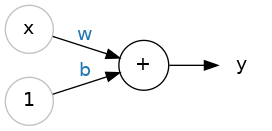

The diagram above shows a basic Linear Neural Network. The input for this unit is `x`, the connection to the neuron has a `weight` of `w`. `b` is a parameter which represents `bias`, a special type of weight. We use the bias to modify the output independently of the input.

`y` is the neurons output. To get the output, the neuron sums all of its values through its connections and we find that the `neuron activation` is:

```
y = w * x + b
```

Weird. That looks exactly like: `y = mx+c` or the equation of a line.

And that's because it is!



A simple example may be calculating how many calories you get from a quantity of sugar. We start with our input `sugars` (or realistically grams of sugar per serving), `calories` as our output, and experimentally find our `bias` to be `b=90` and the `weight` as `w=2.5`.

We could estimate the caloric content of some food with 5g of sugar per serving using:

`calories = 2.5 * 5 + 90 = 102.5`

Let's take a look:

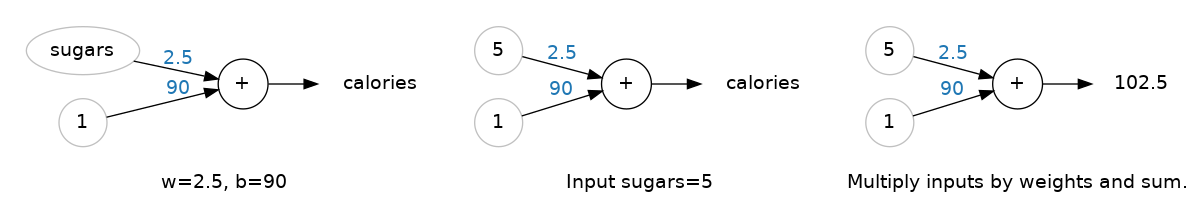

What about multiple inputs?

#### Multiple Input

While the example we used above was relatively simple, we may require many more input connections to the single neuron - one for each additional feature.

Features using the previous example may be `fiber`, `protein` and so on.

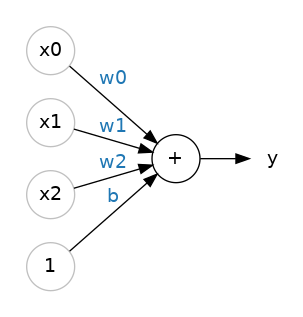

The formula for something like the diagram above becomes something like:

y = 𝑤0𝑥0 + 𝑤1𝑥1 + 𝑤2𝑥2 + b

Alright - now lets convert that formula above into Python code

In [ ]:
from tensorflow import keras
from keras import layers

# Create a network with 1 linear unit
model = keras.Sequential([
    layers.Dense(units=1, input_shape = [3])
])

# units = 1 because we only have 1 output
# input_shape = 3 because we are accepting 3 input parameters: 'sugars', 'fiber' and 'protein'

That wasn't too hard - Tensorflow and Keras actually help take away the difficulty of having to implement all of these methods from scratch. Next we'll look at some more layers!

### Layers

Neural Networks organize their neurons by `Layers`. When we have a group of linear units with a common set of inputs, we get what is referred to as a [Dense Layer](https://analyticsindiamag.com/a-complete-understanding-of-dense-layers-in-neural-networks/).

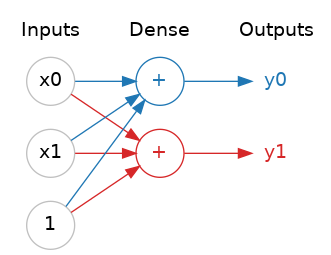

The diagram above shows a Dense Layer made of 2 Linear Units receiving 2 Inputs and a Bias.

You may be realizing that each layer offers some form of relatively simple data transformation. In a well trained model, each layer is a transformation that gets us a bit closer to a solution. And these transformations may be simple [arithmetic](https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html) or [feature engineering](https://towardsdatascience.com/what-is-feature-engineering-importance-tools-and-techniques-for-machine-learning-2080b0269f10).

Unfortunately, two `Dense Layers` are not any better than a single one, since they remain in the world of lines and planes. This is where we introduce a new topic: the Activation Function!

### Activation Function

So it turns out we need something `nonlinear` in order to force the Neural Network to learn new relationships - else they would only be capable of understanding linear ones. 

An activation function is simply some function that we apply to each of a layer's outputs (its activations).

The most common being the `RECTIFIER FUNCTION MAX(0,x)`**bold text**

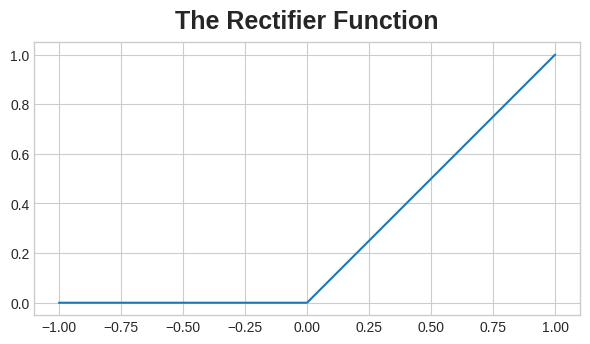

### RELU

`ReLU` or [Rectified Linear Unit](https://deepai.org/machine-learning-glossary-and-terms/relu) is the most common rectifier function. When we attach a `ReLU Function` to a linear unit (go back to the Neurons section above if you don't remember what that is) - its output becomes `max(0, w * x + b)`

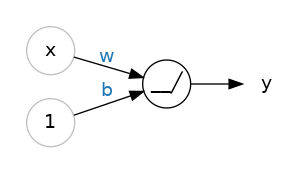

Now that we have some non-linearity, we can stack multiple layers to achieve complex data transformations.

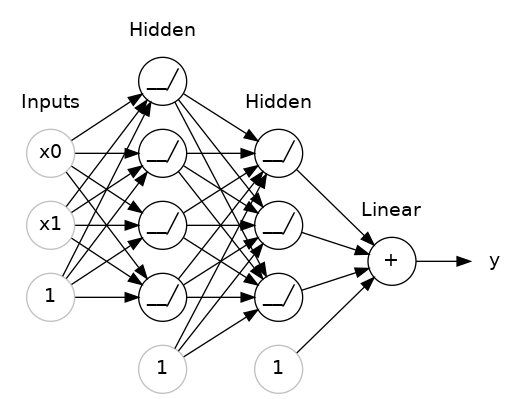

The diagram above shows a stack of dense layers to create a fully connected network. Many `inputs` are fed to various parameter transformations at the `input layer` and repeatedly transformed by multiple `inner` or `hidden` layers (more on this in a bit), and then recombined at the end to provide with some `output`.

### Hidden Layers

`Hidden Layers` are really just any layer before the output layer. Because we do not usually see their respective outputs directly, they are considered to be 'hidden'.

### Output Layer

Looking at the previous diagram once more, we saw that there was a point of recombination at the end. This final `output` layer is a `linear unit` (check back neurons section), which means there are no activation functions acting on it.

Usually a lack of an activation function on the output layer means its a good candidate for predicting some arbitrary numerical value - but another task, such as `classification` may require an activation function on the output.

Alright, that was a lot of theory - let's try some code.

## Building a Sequential Model

A `sequential model` is an interconnection of layers from first to last, where the first layer gets the `input` and the last produces an `output`.

In [ ]:
from tensorflow import keras
from keras import layers

model = keras.Sequential([
    # the hidden ReLU layers
    layers.Dense(units = 4, activation = 'relu', input_shape = [2]), # input_shape defines the input layer for us since it feeds the first hidden layer
    layers.Dense(units = 3, activation = 'relu'),
    # the linear output layer
    layers.Dense(units = 1),
])

## Training Models

So far we've built the layers of our model. And all of the bias values or as they're really called: `weights` have been set randomly - that means the network doesn't really know anything yet. In this section, we'll see how Neural Networks 'learn'.

At this stage, we need a couple of things first:


1.   [Data](https://www.cloudfactory.com/training-data-guide): specifically a high quality dataset with enough samples to use as training data
2.   [Loss Function](https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/): a measure of how good our predictions are
3.   [Optimizer](https://towardsdatascience.com/optimizers-for-training-neural-network-59450d71caf6): an algorithm that tells the network how to adjusts its weights



### Loss Functions

THe `Loss Function` measures disparity between the true value and the value which the model predicts. Different problems call for different loss functions. So far we've only discussed `REGRESSION` where the task is some numerical value, for example, predicting the fuel efficiency of a car, or the price of food at the market given changes in the environment.

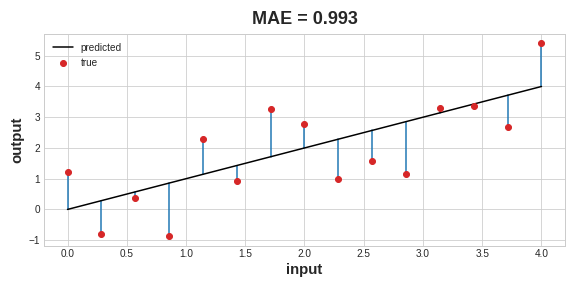

The diagram above shows `MAE` or `Mean Absolute Error` - a common loss function for regression problems. 

<i>Note: You might remember drawing lines of best fit and then calculating the error values to see how good your lines were. This is effectively the same thing!</i>

For each prediction, `y_predicted`, the MAE measures the disparity from the true target `y_true` by an absolute difference `abs(y_true - y_predicted)`

Some other loss functions you might encounter for regression problems are:

*   Mean Squared Error (MSE)
*   Huber Loss

If you want a more in-depth understanding, I'd advise you check out [this article](https://towardsdatascience.com/understanding-the-3-most-common-loss-functions-for-machine-learning-regression-23e0ef3e14d3).


### Optimizers

Optimizers are algorithms that adjust the weights to minimize the loss values and reduce the errors during predictions. 

Almost all optimizers belong to a family of algorithms known as `STOCHASTIC GRADIENT DESCENT` or SGD, which are iterative functions that train the network in steps.

For example, a single step may look something like this:



1.   Sample some training data and run it through the network to make predictions
2.   Measure the loss between prediction and true values
3.   Finally, adjust the weights in a direction that makes the loss smaller.

One of the most popular [SGD algorithms](https://ruder.io/optimizing-gradient-descent/) used is `ADAM` which has an adaptive learning rate that makes it suitable for almost any problem without any tuning. It's self-tuning in a sense.

The diagram below shows what happens during training with SGD.

<img src="https://i.imgur.com/rFI1tIk.gif" width =1000>

Since each iteration takes a smaller sample of data from the full set, this is called a `minibatch` or sometimes just `batch`.

A complete round of training is referred to as an `epoch` - and the number of epochs you train for determines how many times the network will see each training example.

## Compiling Models

Now that we know about the Loss Functions and Optimizers, we can compile a model.

In [ ]:
# To compile a model using Tensorflow and Keras, we use the following code

model.compile(
    optimizer = "adam", #keras.optimizers.Adam()
    loss = "mae", #keras.losses.mae
)

## EXTRA READING

Deep Learning is a very wide ranging field and so far we've only covered a handful of neural network topics, albeit they are the essentials to get you started.

There are many more topics to improve these basic models which I think are very important, but were too much to include in this session.



*   [Overfitting & Underfitting](https://www.geeksforgeeks.org/underfitting-and-overfitting-in-machine-learning/)
*   [Dropout & Batch Normalization](https://medium.com/mlearning-ai/demystifying-batch-normalization-vs-drop-out-1c8310d9b516)
*   [Binary Classification]()
*   [Types of Neural Networks](https://www.mygreatlearning.com/blog/types-of-neural-networks/)




# Let's actually look at a real use case...

In [ ]:
# Colab doesn't have these modules so we'll use a specific syntax here to install them

!pip install --upgrade pandas-datareader # upgrade pandas-datareader, the installed version was being problematic with our dataset unfortunately
!pip install yfinance # install yahoo finance module to access ticker data. Visit https://finance.yahoo.com to see more on Stock Tickers!

In [58]:
import yfinance as yf # here we import our yahoo finance module
yf.pdr_override()  # we use an override function built into the module to set the source. Otherwise we can remote these and use any source compliant with Pandas Datareader requirements!

import pandas as pd # a data analysis module
import numpy as np # a mathematical module
import matplotlib.pyplot as plt # a visualization module for graphs
import datetime as dt # a module that allows us to work with dates and times

from sklearn.preprocessing import MinMaxScaler # we're using a minmax scaler here

from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM # we'll be creating an LTSM neural network for this

from pandas_datareader import data as pdr # here we imported the datareader module as pdr - remember we overrided the source data before!

In [32]:
# Declaring Global Variables

stock = "TSLA" # the ticker we are interested in for this. Try other ticker values.
data_source = "yahoo" # I declared the data source, even though we're using it directly from the overriden module

start_period = dt.datetime(2012, 1, 1) # Datetime positionally takes the format of YEAR, MONTH, DAY, HOUR, MINUTE, SECOND in that order. We're only using the date here!
end_period = dt.datetime(2020, 12, 31)

data = pdr.DataReader(stock, start= start_period, end= end_period) # we create an instance of our data, by declaring the ticker we're interested in, the start period, and end period. Notice that the dates were declared using named parameters.

[*********************100%***********************]  1 of 1 completed


In [45]:
# Prepare the data

scaler = MinMaxScaler(feature_range=(0,1)) # here we created an instance of the MinMaxScaler and set its boundaries between 0 and 1.
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1)) # we're using data at "Close" time - https://www.investopedia.com/terms/c/close.asp

prediction_range = 60 # We're interested in creating predictions using data from the last 60 days

x_train = [] # created an empty list for the x_training and y_training dimensions respectively
y_train = []

In [46]:
# Preprocessing the Data

for x in range(prediction_range, len(scaled_data)):

# We'll be iterating through all values within our prediction range and adding/appending it to the empty lists we declared before

  x_train.append(scaled_data[x-prediction_range:x,0]) # append to x_train
  y_train.append(scaled_data[x,0]) # append to y_train

x_train, y_train = np.array(x_train), np.array(y_train) # create a numpy array for each of the lists and reassign it to the previous x_train and y_train variables.
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1],1)) # reshape the values to conform with the dimensions we want. Try checking the shape of the array!

'''
Note that numpy arrays are different to the standard python arrays such as lists, 
tuples, etc in that they are more performant when we're doing large, complex and 
computationally intense operations on them. If you want to learn more, check out 
this bit of documentation: https://numpy.org/devdocs/user/absolute_beginners.html
'''

In [ ]:
# Build the model

model = Sequential()

model.add(LSTM(units = 50, return_sequences=True, input_shape= (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

In [48]:
# Save the model so you dont need to keep retraining it

# model.save()

In [55]:
# Test the model

test_start = dt.datetime(2021, 1, 1)
test_end = dt.datetime.now()

test_data = pdr.DataReader(stock, test_start, test_end)
actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_range:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

[*********************100%***********************]  1 of 1 completed


In [56]:
# Make Predictions 

x_test = []

for x in range(prediction_range, len(model_inputs)):
  x_test.append(model_inputs[x-prediction_range:x,0])


x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1 ))

predicted_prices = model.predict(x_test)

predicted_prices = scaler.inverse_transform(predicted_prices)


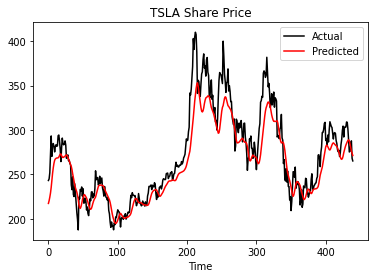

In [59]:
# Visualise the Data

plt.plot(actual_prices, color="black", label = "Actual")
plt.plot(predicted_prices, color = "red", label = "Predicted")
plt.title(f"{stock} Share Price")
plt.xlabel('Time')
plt.legend()
plt.show()

This last example, I showed you a typical workflow for performing data analysis and machine learning tasks. It may be more complex or sometimes simpler that what you learnt, and depends greatly on the application you're trying to achieve.

**NOTE**: The previous example was not meant to be a real price prediction for investing, rather just a proof of concept to show the method. Real stock predictors can include many more layers of dimensionality and data sources - and often times are designed using more efficient methods and high end compute functions due to stock data being realtime. 